In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

# de XLSX a CSV

In [6]:
# Ruta a tu archivo Excel
excel_file = './data/Estadisticas_historicas_comercializacion.xlsx'

os.makedirs('data', exist_ok=True)

# ajusta estos valores según tu archivo:
skip_top = 6     # filas de encabezado a omitir
skip_bottom = 3  # filas de pie de página a omitir

df_import = pd.read_excel(
    excel_file,
    sheet_name='IMPORTACION',
    engine='openpyxl',
    skiprows=skip_top,
    skipfooter=skip_bottom
)
df_consumo = pd.read_excel(
    excel_file,
    sheet_name='CONSUMO',
    engine='openpyxl',
    skiprows=skip_top,
    skipfooter=skip_bottom
)

df_import.to_csv('data/importacion.csv', index=False, encoding='utf-8-sig')
df_consumo.to_csv('data/consumo.csv',    index=False, encoding='utf-8-sig')

print("Listo: data/importacion.csv y data/consumo.csv creados sin header ni footer.")

Listo: data/importacion.csv y data/consumo.csv creados sin header ni footer.


# Analisis Exploratorio Consumo

In [9]:
df = pd.read_csv('data/consumo.csv', parse_dates=['Fecha'])
df

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gas natural,...,Kerosina,Mezclas\r\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,2000-01-01,0.00,48446.00,296766.99,0.00,0.00,0.00,0.00,194410.476190,NaN,...,64026.09,0.00,0.00,0.00,0.00,0.00,0.0,634667.06,0,1.750545e+06
1,2000-02-01,0.00,50597.00,328116.44,0.00,0.00,0.00,0.00,174710.552381,NaN,...,62660.30,0.00,0.00,0.00,0.00,0.00,0.0,642380.66,0,1.773220e+06
2,2000-03-01,0.00,27593.00,368589.63,0.00,0.00,0.00,0.00,189234.066667,NaN,...,61361.99,0.00,0.00,0.00,0.00,0.00,0.0,699807.25,0,1.909499e+06
3,2000-04-01,0.00,53794.00,396300.47,0.00,0.00,0.00,0.00,174330.607143,NaN,...,61814.32,0.00,0.00,0.00,0.00,0.00,0.0,586803.98,0,1.800933e+06
4,2000-05-01,0.00,60137.00,449368.92,0.00,0.00,0.00,0.00,191745.147619,NaN,...,54098.32,0.00,0.00,0.00,0.00,0.00,0.0,656948.20,0,1.941772e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024-08-01,32669.87,16086.77,155156.95,-129.83,88992.17,1220254.20,13769.72,551959.940000,-5125.38,...,145.23,1757.07,547.58,865931.91,84348.69,11037.39,0.0,0.00,0,4.617048e+06
296,2024-09-01,17724.39,14404.37,129059.65,-682.98,78639.27,1161480.31,14234.41,555676.210000,-3617.05,...,50.76,1442.97,92.59,491181.54,78185.20,16852.16,0.0,0.00,0,4.068636e+06
297,2024-10-01,2900.53,14718.66,168233.85,18.55,77767.06,1399433.57,15236.22,600476.170000,0.00,...,129.48,1816.42,301.66,487452.36,88885.31,15873.86,0.0,0.00,0,4.599042e+06
298,2024-11-01,26601.36,40510.01,126219.84,42.69,82355.21,1307939.01,24281.06,597059.900000,0.00,...,-405.57,3646.69,213.66,458139.11,77270.48,12489.70,0.0,0.00,0,4.281218e+06


## Combinar variantes de diesel en una sola columna “Diesel”

In [11]:
diesel_cols = ['Diesel alto azufre', 'Diesel bajo azufre', 'Diesel ultra bajo azufre']
df['Diesel'] = df[diesel_cols].sum(axis=1)

## Seleccionar sólo Fecha y las tres variables de interés

In [13]:
cols = ['Gasolina regular', 'Gasolina superior', 'Diesel']
df = df[['Fecha'] + cols].dropna()

## Estadísticas descriptivas

In [14]:
print("=== Estadísticas descriptivas ===")
print(df[cols].describe())

=== Estadísticas descriptivas ===
       Gasolina regular  Gasolina superior        Diesel
count        300.000000         300.000000  3.000000e+02
mean      397478.894458      470248.678849  8.821302e+05
std       219102.049432      113504.653305  2.291115e+05
min       160741.900000      300242.781667  5.076627e+05
25%       215650.312917      383931.904375  6.997895e+05
50%       288193.130000      423319.540000  8.110382e+05
75%       548073.682500      573704.195000  1.053747e+06
max       938086.570000      786598.120000  1.499266e+06


## Test “discreto” vs “continuo” por conteo de únicos

In [23]:
for c in cols:
    total = len(df)
    unicos = df[c].nunique()
    ratio = unicos / total
    pct = ratio * 100

    print(f"{c}: dtype={df[c].dtype}")
    print(f"  únicos: {unicos} de {total} ({pct:.2f}%)")

    if ratio > 0.05:
        print("  ⇒ parece CONTINUA (muchos valores únicos)\n")
    else:
        print("  ⇒ podría ser DISCRETA (pocos valores únicos)\n")

Gasolina regular: dtype=float64
  únicos: 300 de 300 (100.00%)
  ⇒ parece CONTINUA (muchos valores únicos)

Gasolina superior: dtype=float64
  únicos: 300 de 300 (100.00%)
  ⇒ parece CONTINUA (muchos valores únicos)

Diesel: dtype=float64
  únicos: 300 de 300 (100.00%)
  ⇒ parece CONTINUA (muchos valores únicos)



##  Histogramas, Q–Q plots y test de normalidad (Shapiro–Wilk)

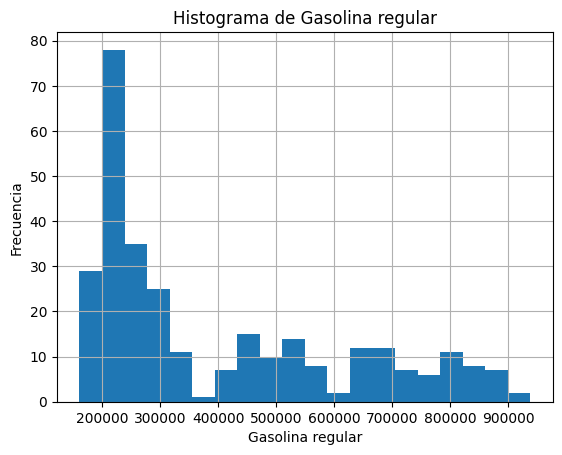

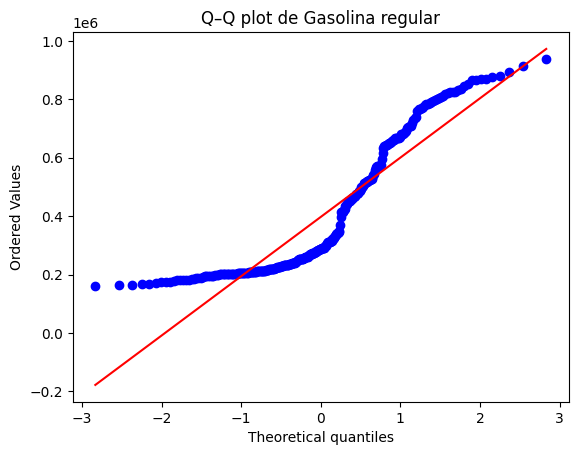

Shapiro–Wilk para Gasolina regular: W=0.8452, p‐value=0.0000



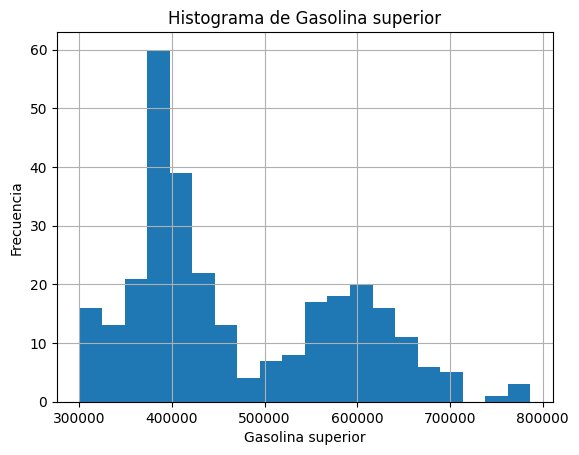

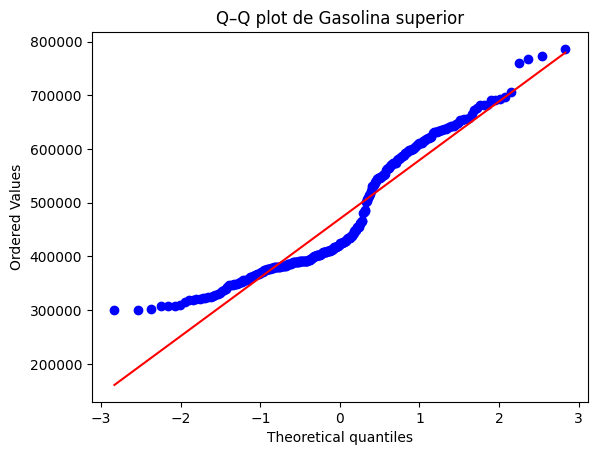

Shapiro–Wilk para Gasolina superior: W=0.9129, p‐value=0.0000



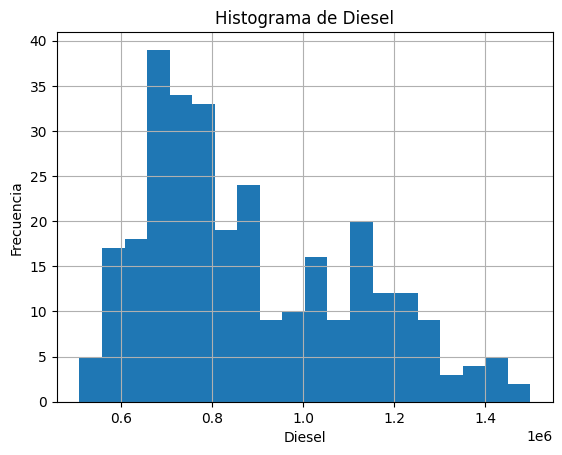

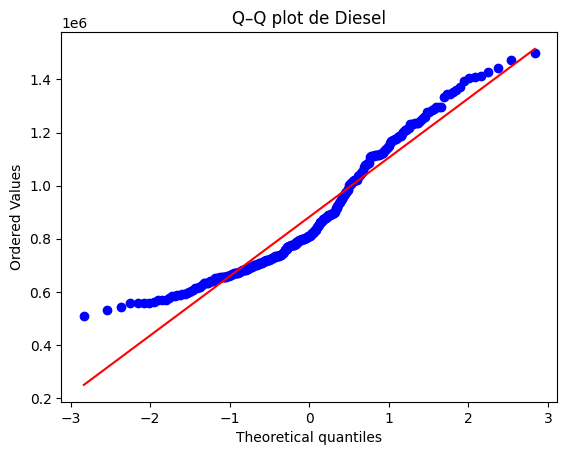

Shapiro–Wilk para Diesel: W=0.9370, p‐value=0.0000



In [15]:
for c in cols:
    plt.figure()
    df[c].hist(bins=20)
    plt.title(f'Histograma de {c}')
    plt.xlabel(c); plt.ylabel('Frecuencia')
    plt.show()

    plt.figure()
    stats.probplot(df[c], dist="norm", plot=plt)
    plt.title(f'Q–Q plot de {c}')
    plt.show()

    W, p = stats.shapiro(df[c])
    print(f"Shapiro–Wilk para {c}: W={W:.4f}, p‐value={p:.4f}\n")

## Agregar columnas de año y mes

In [17]:
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.to_period('M')

## Top 10 meses con mayor consumo total

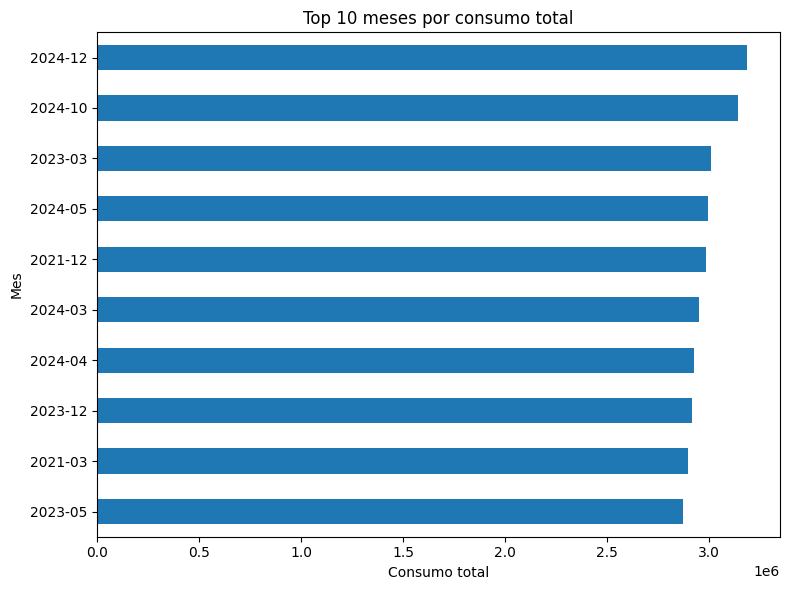

In [24]:
df['Total'] = df[cols].sum(axis=1)
top_meses = df.groupby('Mes')['Total'].sum().nlargest(10)
plt.figure(figsize=(8,6))
top_meses.sort_values().plot(kind='barh')
plt.title('Top 10 meses por consumo total')
plt.xlabel('Consumo total')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()

## Picos anuales por tipo de combustible

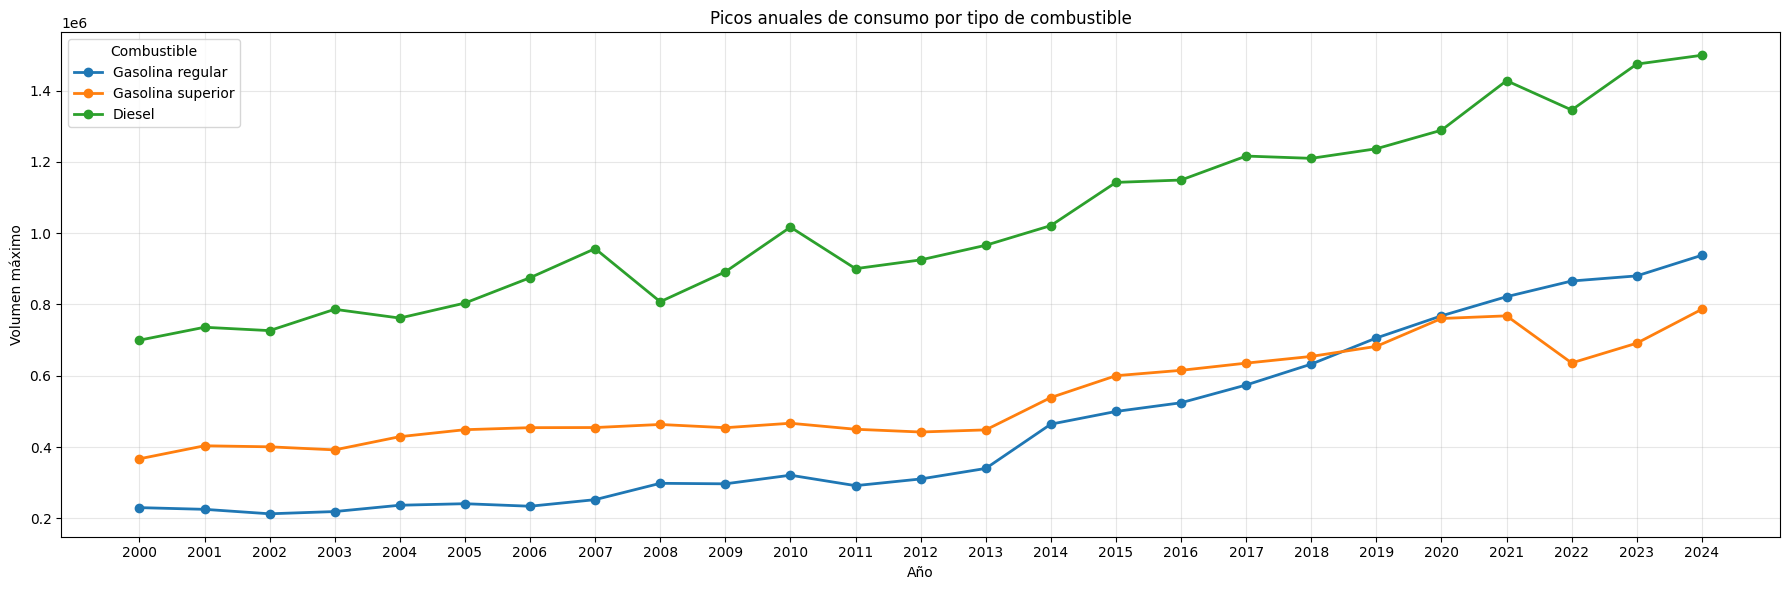

In [29]:
picos_anuales = df.groupby('Año')[cols].max()
años = picos_anuales.index.astype(int)

plt.figure(figsize=(18,6))
for c in cols:
    plt.plot(años, picos_anuales[c], marker='o', linewidth=2, label=c)

plt.title('Picos anuales de consumo por tipo de combustible')
plt.xlabel('Año')
plt.ylabel('Volumen máximo')
plt.xticks(años)        
plt.legend(title='Combustible')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Evolución en los últimos 5 años

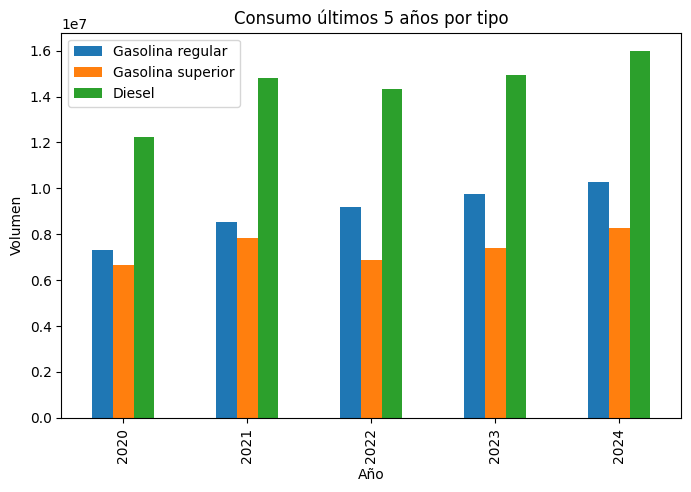

In [20]:
ultimo = df['Año'].max()
ult5 = df[df['Año'] >= ultimo - 4]
suma_ult5 = ult5.groupby('Año')[cols].sum()
suma_ult5.plot(kind='bar', figsize=(8,5))
plt.title('Consumo últimos 5 años por tipo')
plt.ylabel('Volumen')
plt.show()

## Comportamiento durante la pandemia (2020–2021)

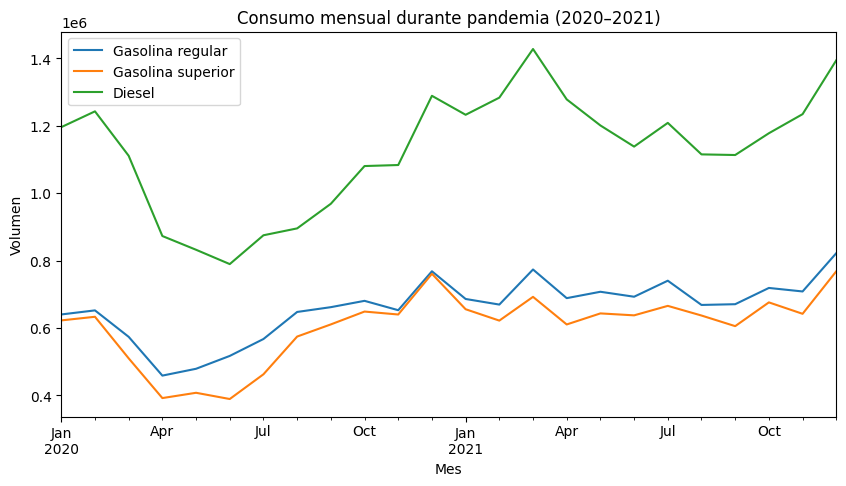

In [21]:
pandemia = df[df['Año'].isin([2020, 2021])]
mensual_pandemia = pandemia.groupby('Mes')[cols].sum()
mensual_pandemia.plot(figsize=(10,5))
plt.title('Consumo mensual durante pandemia (2020–2021)')
plt.ylabel('Volumen')
plt.show()

## Consumo total de los combustibles por años

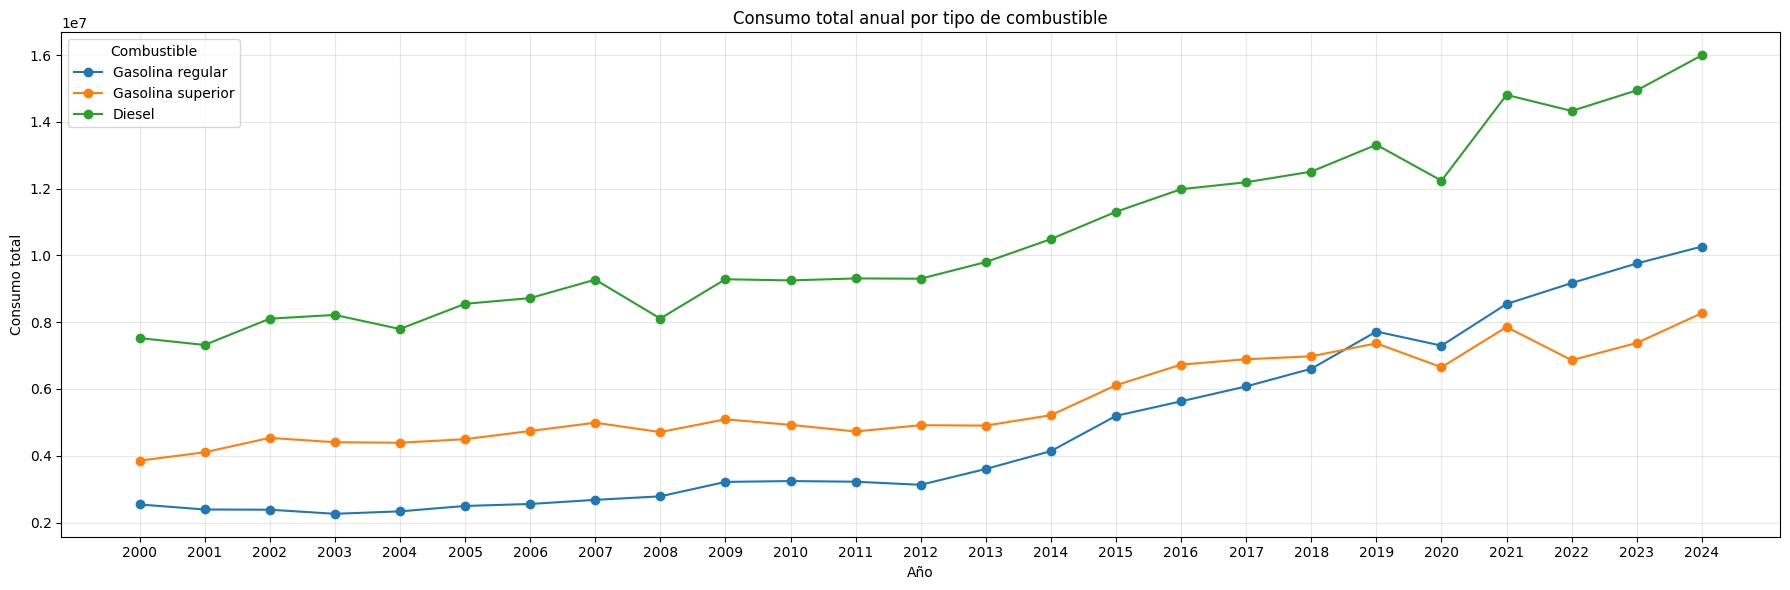

In [32]:
yearly = df.groupby('Año')[cols].sum()

plt.figure(figsize=(18,6))
for c in cols:
    plt.plot(yearly.index, yearly[c], marker='o', label=c)

plt.title('Consumo total anual por tipo de combustible')
plt.xlabel('Año')
plt.ylabel('Consumo total')
plt.xticks(yearly.index)
plt.legend(title='Combustible')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Media y desviacion estandar

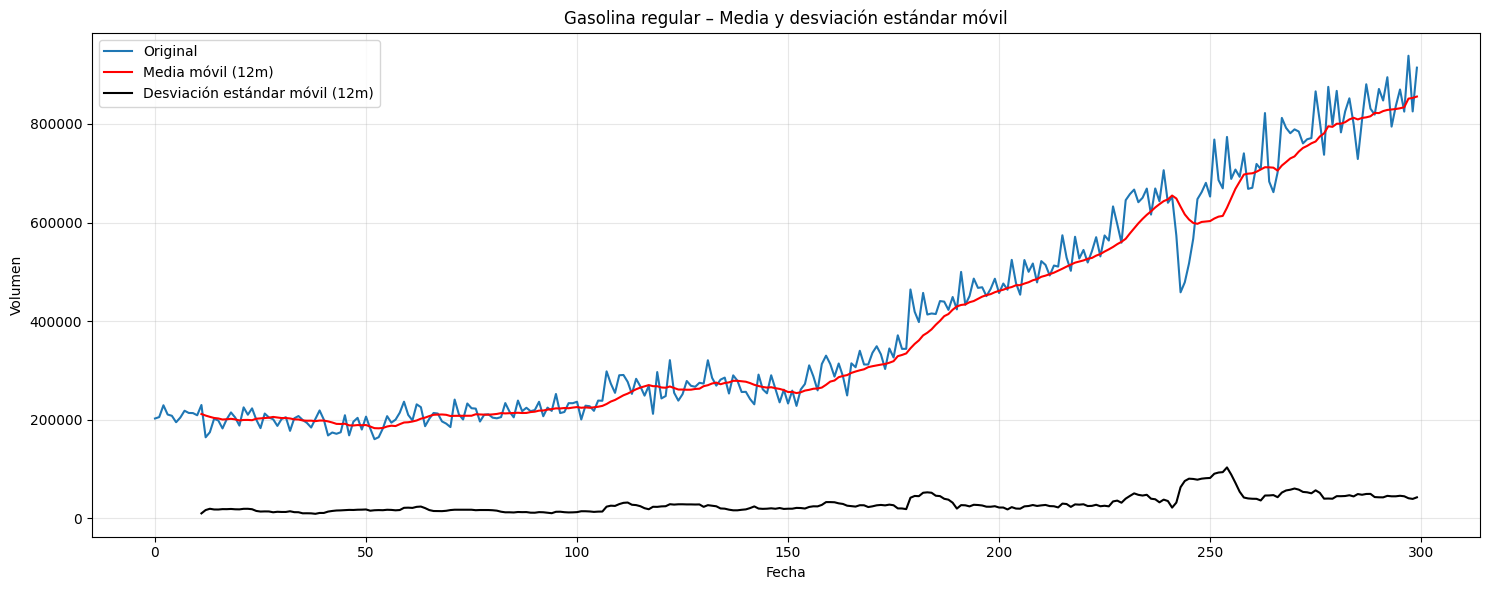

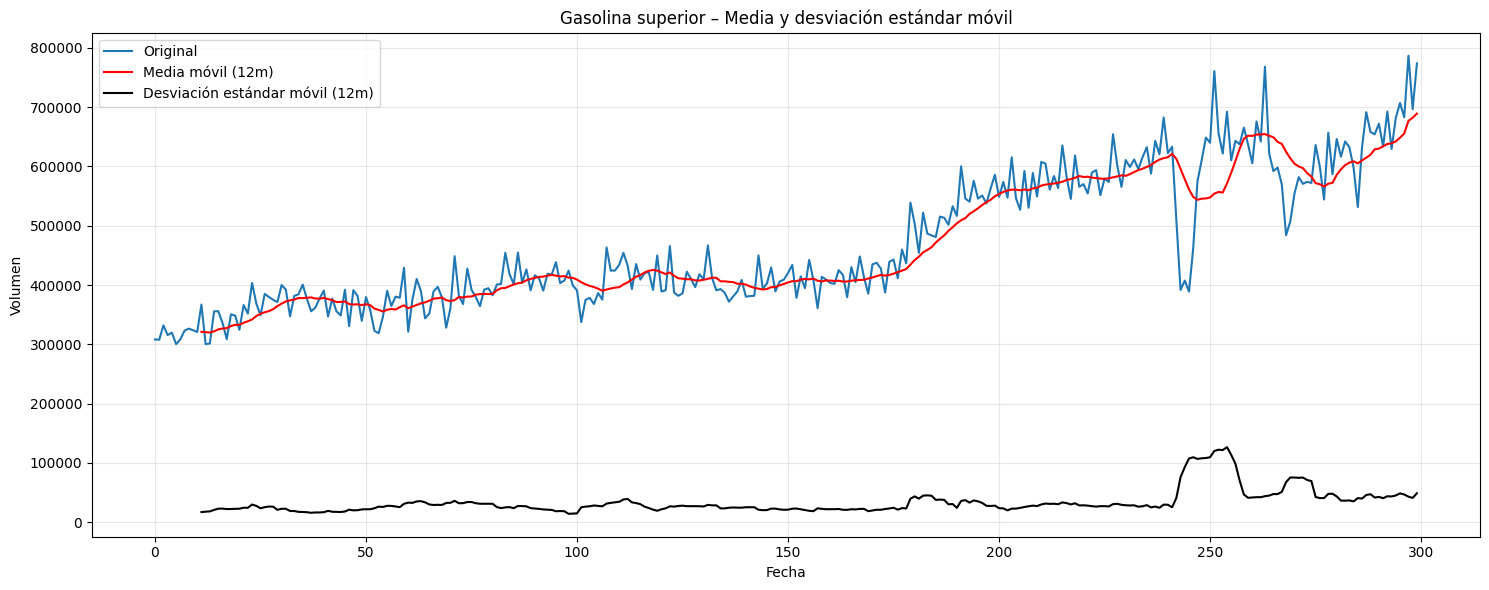

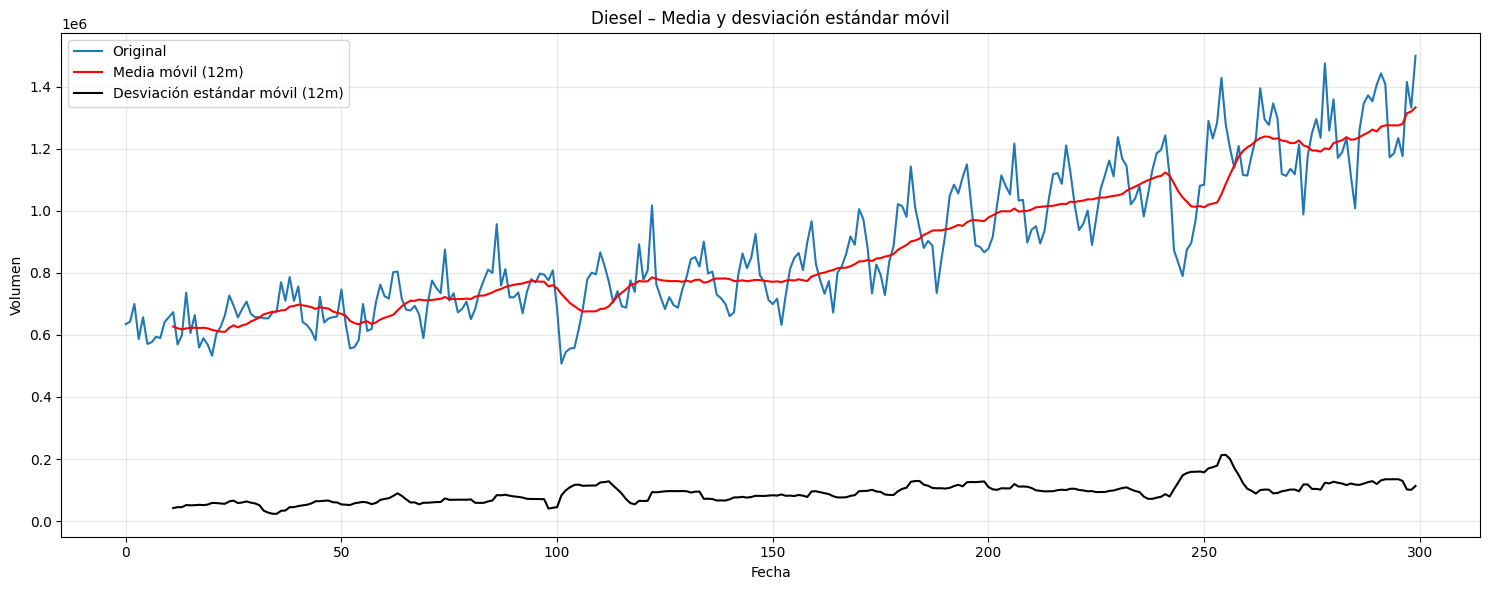

In [37]:
cols = ['Gasolina regular', 'Gasolina superior', 'Diesel']
window = 12  # meses

# Generar un gráfico por cada tipo de combustible
for c in cols:
    ts = df[c].dropna()
    roll_mean = ts.rolling(window).mean()
    roll_std  = ts.rolling(window).std()

    plt.figure(figsize=(15,6))
    plt.plot(ts.index, ts, label='Original')
    plt.plot(roll_mean.index, roll_mean, color='red', label=f'Media móvil ({window}m)')
    plt.plot(roll_std.index, roll_std, color='black', label=f'Desviación estándar móvil ({window}m)')
    plt.title(f'{c} – Media y desviación estándar móvil')
    plt.xlabel('Fecha')
    plt.ylabel('Volumen')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

## DESCOMPOSICION ADITIVA

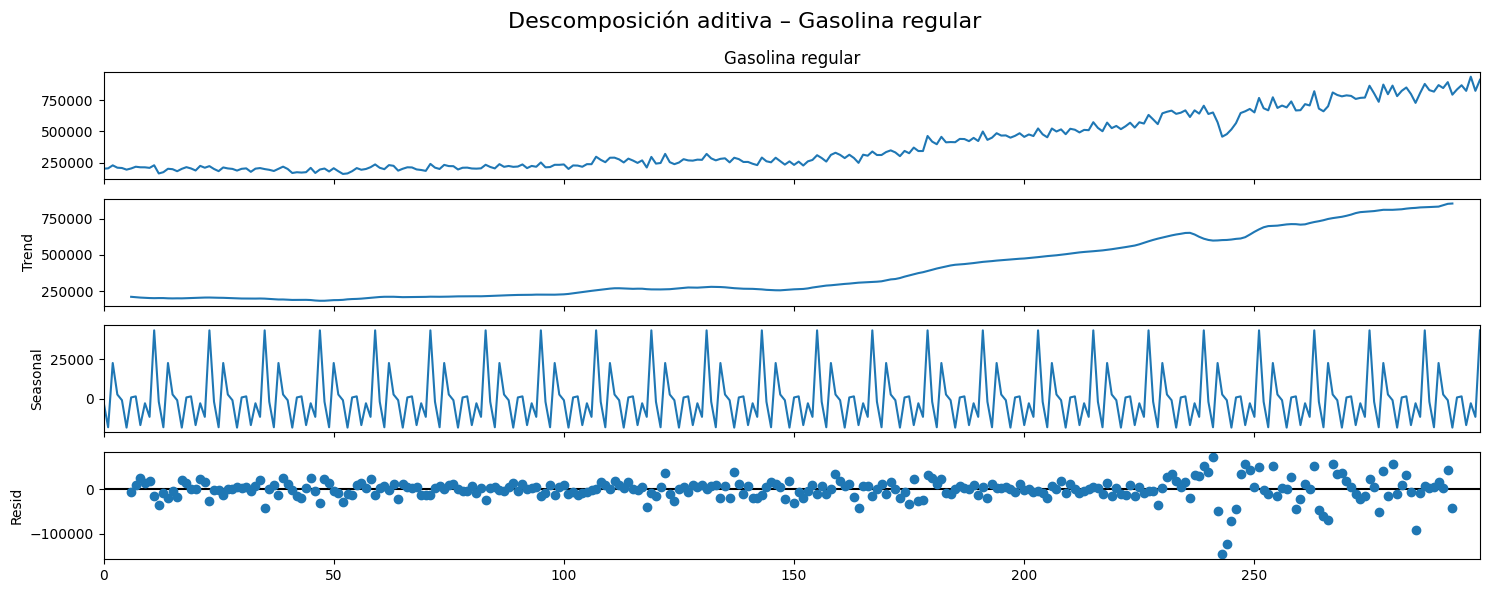

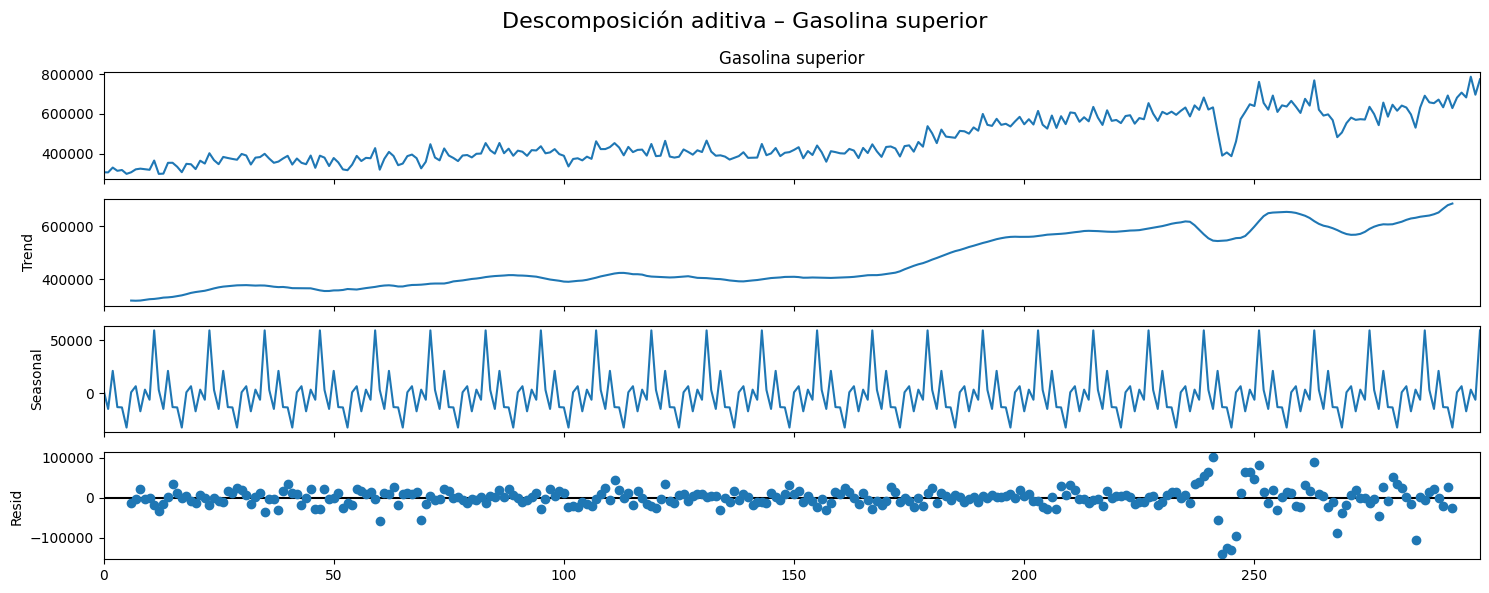

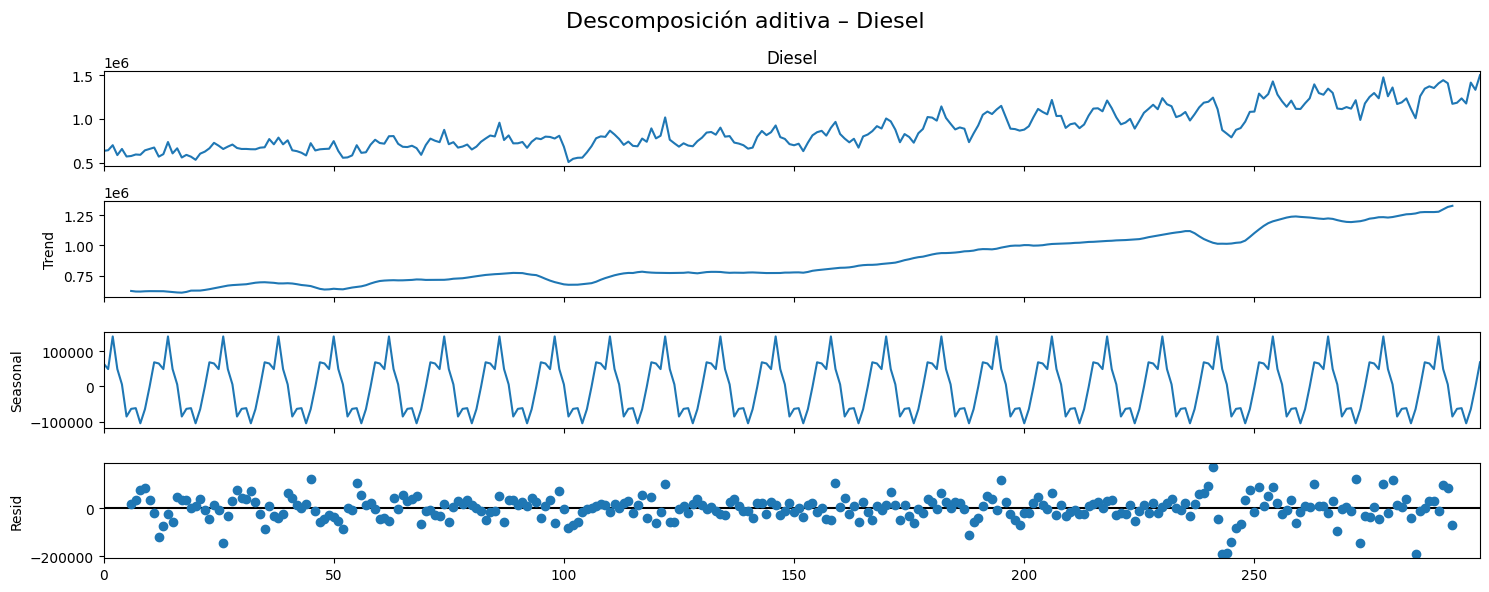

In [47]:
for c in cols:
    ts = df[c].dropna()
    result = seasonal_decompose(ts, model='additive', period=window)
    
    # Genera la figura y ajusta el tamaño (width=16, height=9)
    fig = result.plot()
    fig.set_size_inches(15, 6)
    
    fig.suptitle(f'Descomposición aditiva – {c}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Analisis exploratorio importacion

In [50]:
df = pd.read_csv('./data/importacion.csv', parse_dates=['Fecha'], dayfirst=True)

## Unificar variacion de diesel y fechas

In [51]:
diesel_cols = ['Diesel alto azufre', 'Diesel bajo azufre', 'Diesel ultra bajo azufre']
df['Diesel'] = df[diesel_cols].sum(axis=1)

In [52]:
cols = ['Gasolina regular', 'Gasolina superior', 'Diesel']
df = df[['Fecha'] + cols].dropna()

## Estadísticas descriptivas

In [53]:
print("=== Estadísticas descriptivas ===")
print(df[cols].describe())

=== Estadísticas descriptivas ===
       Gasolina regular  Gasolina superior        Diesel
count      2.880000e+02       2.880000e+02  2.880000e+02
mean       4.129493e+05       4.909544e+05  8.950957e+05
std        2.432627e+05       1.565581e+05  2.939973e+05
min        8.101530e+04       1.702925e+05  2.297647e+05
25%        2.082069e+05       3.693299e+05  6.920462e+05
50%        3.275593e+05       4.813002e+05  8.462861e+05
75%        5.761171e+05       6.083053e+05  1.124961e+06
max        1.141366e+06       1.227174e+06  1.630636e+06


## Histogramas, Q–Q plots y test de normalidad

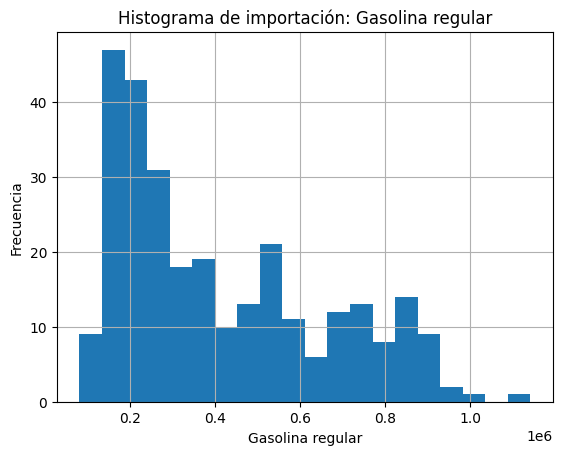

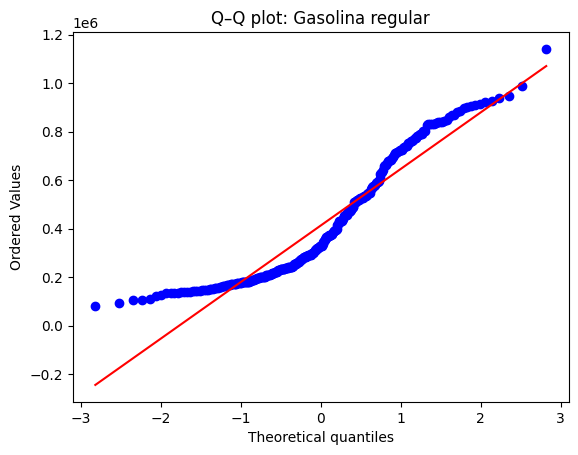

Shapiro–Wilk para Gasolina regular: W=0.9050, p‐value=0.0000



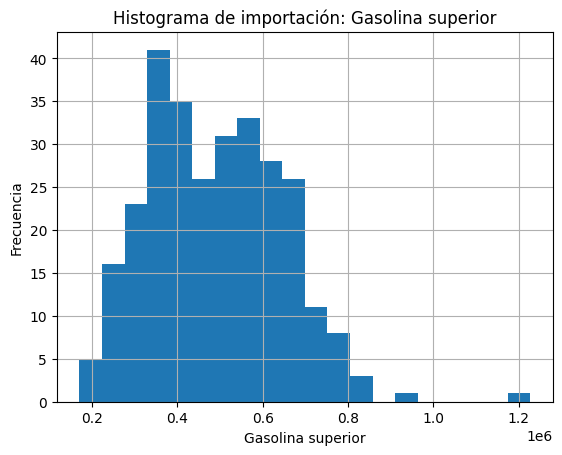

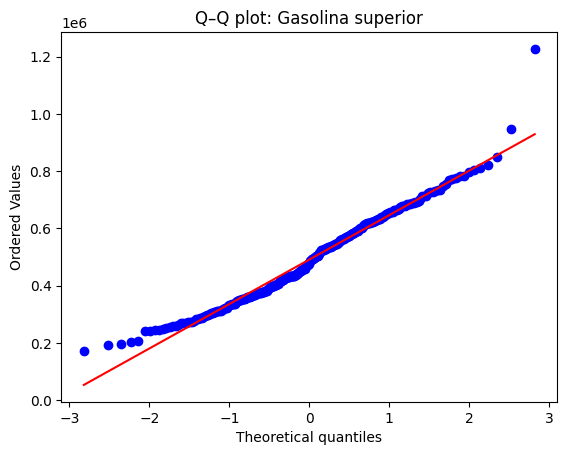

Shapiro–Wilk para Gasolina superior: W=0.9737, p‐value=0.0000



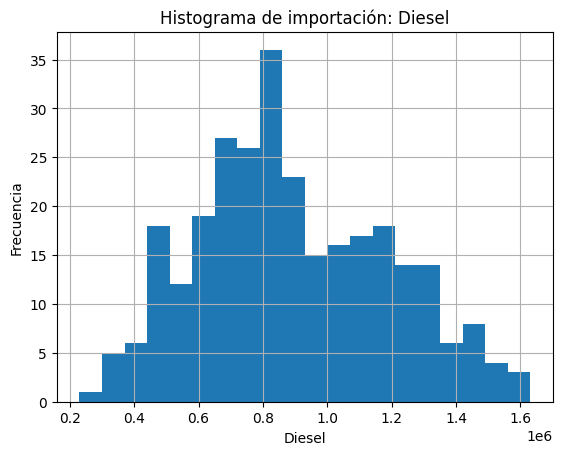

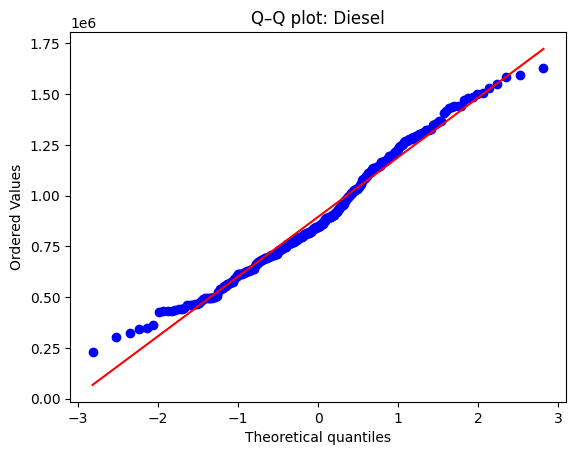

Shapiro–Wilk para Diesel: W=0.9820, p‐value=0.0011



In [54]:
for c in cols:
    plt.figure()
    df[c].hist(bins=20)
    plt.title(f'Histograma de importación: {c}')
    plt.xlabel(c); plt.ylabel('Frecuencia')
    plt.show()

    plt.figure()
    stats.probplot(df[c], dist="norm", plot=plt)
    plt.title(f'Q–Q plot: {c}')
    plt.show()

    W, p = stats.shapiro(df[c])
    print(f"Shapiro–Wilk para {c}: W={W:.4f}, p‐value={p:.4f}\n")

## Meses con más importación por tipo

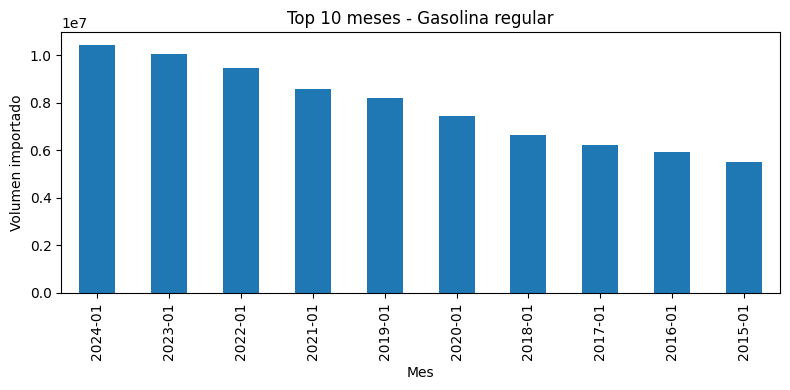

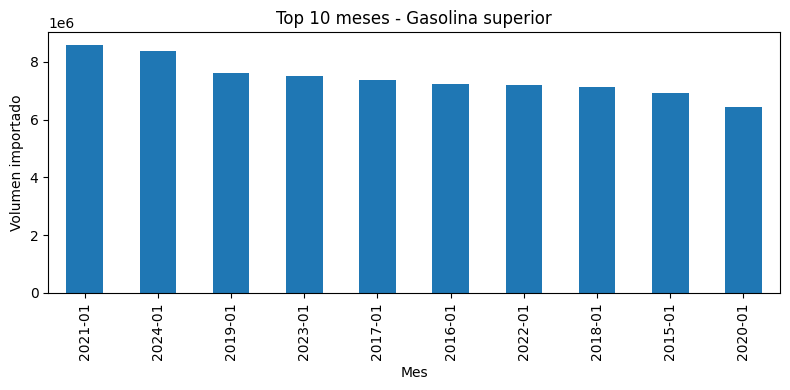

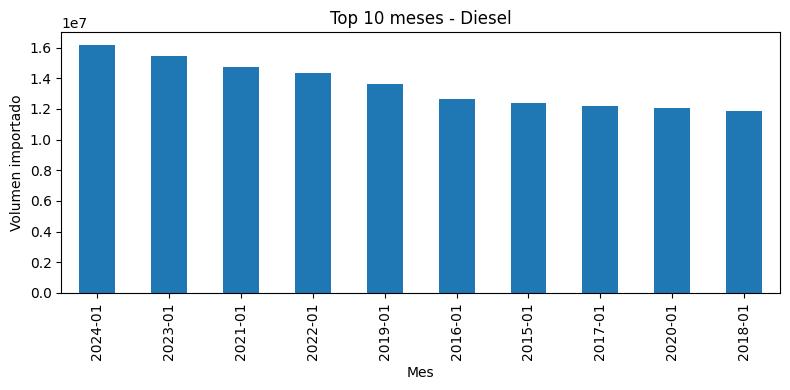

In [56]:
df['Mes'] = df['Fecha'].dt.to_period('M')
monthly = df.groupby('Mes')[cols].sum()

for c in cols:
    top = monthly[c].nlargest(10)
    top.plot(kind='bar', figsize=(8,4), title=f"Top 10 meses - {c}")
    plt.xlabel('Mes'); plt.ylabel('Volumen importado')
    plt.tight_layout(); plt.show()

## Picos anuales por tipo de combustible

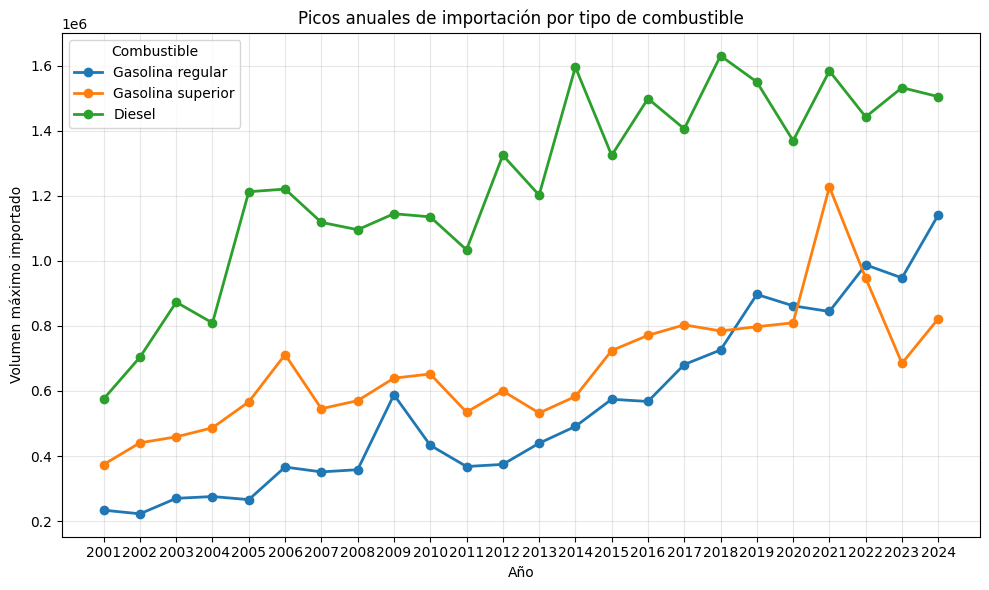

In [61]:
df['Año'] = df['Fecha'].dt.year
picos_anuales = df.groupby('Año')[cols].max()
años = picos_anuales.index.astype(int)

plt.figure(figsize=(10,6))
for c in cols:
    plt.plot(años, picos_anuales[c], marker='o', linewidth=2, label=c)

plt.title('Picos anuales de importación por tipo de combustible')
plt.xlabel('Año')
plt.ylabel('Volumen máximo importado')
plt.xticks(años)
plt.legend(title='Combustible')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Evolución últimos 5 años

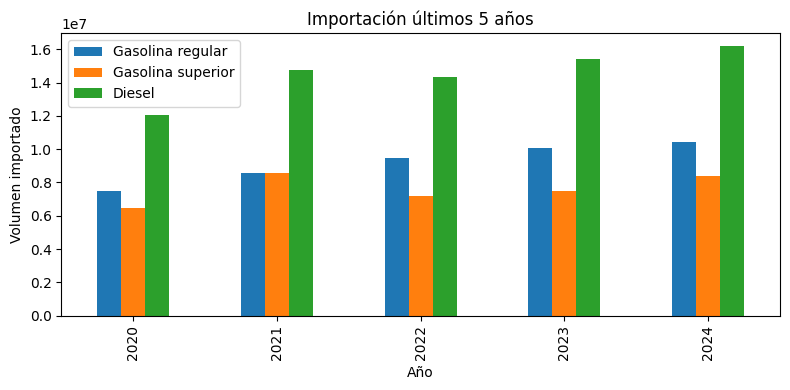

In [59]:
ultimo = df['Año'].max()
ult5 = df[df['Año'] >= ultimo - 4].groupby('Año')[cols].sum()
ult5.plot(kind='bar', figsize=(8,4), title='Importación últimos 5 años')
plt.xlabel('Año'); plt.ylabel('Volumen importado')
plt.tight_layout(); plt.show()

## Comportamiento durante la pandemia (2020–2021)

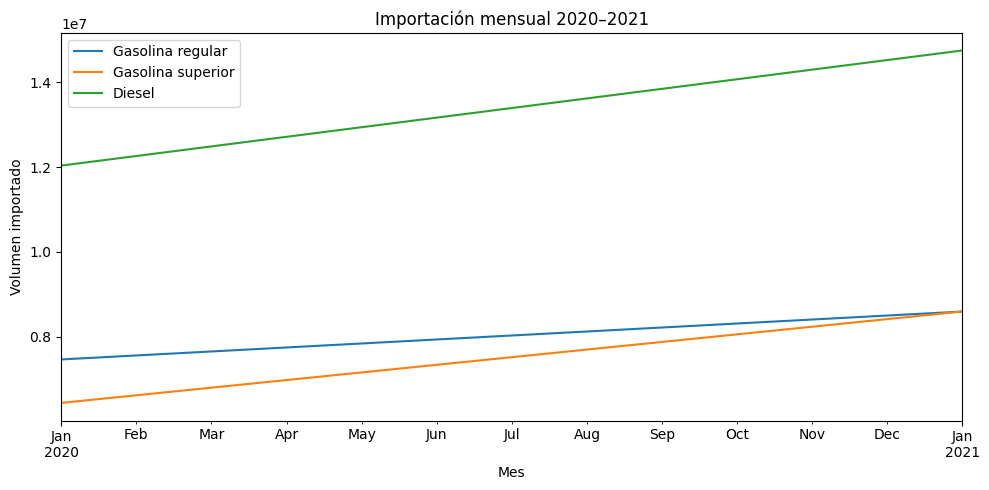

In [60]:
pandemia = df[df['Año'].isin([2020, 2021])].groupby('Mes')[cols].sum()
pandemia.plot(figsize=(10,5), title='Importación mensual 2020–2021')
plt.xlabel('Mes'); plt.ylabel('Volumen importado')
plt.tight_layout(); plt.show()

## Importacion total

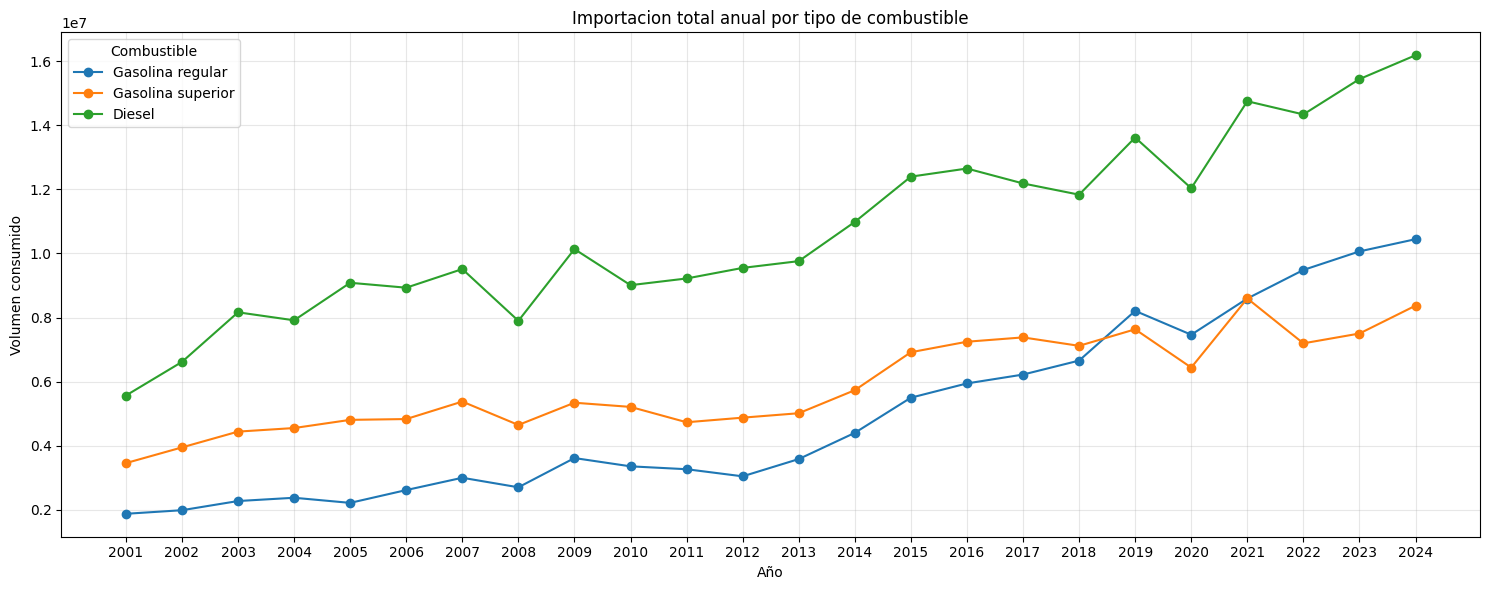

In [65]:
cols = ['Gasolina regular', 'Gasolina superior', 'Diesel']
yearly = df.groupby('Año')[cols].sum()

plt.figure(figsize=(15,6))
for c in cols:
    plt.plot(yearly.index, yearly[c], marker='o', label=c)

plt.title('Importacion total anual por tipo de combustible')
plt.xlabel('Año')
plt.ylabel('Volumen consumido')
plt.xticks(yearly.index)
plt.legend(title='Combustible')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()